# Neural Network introduction

## PERCEPTRON

In [13]:
import numpy as np

In [14]:
# to get PIL -> pip install Pillow
from PIL import Image
from IPython.display import display

def red_png(path, factor=0.3, yes=0 , source = "DeepLearningIASD.pdf Tristan Cazenave PSL Dauphine"):
    '''This function to display a reduce image.png
    Args:
        path : directory/image.png
        factor : the reduction factor
        yes : set to 0 by default, if put to 1 it means that the size before and after will be displayed
    '''
    img = Image.open(path)
    if yes:
        print("Taille d'origine :", img.size)

    # Redimensionner l'image à 50% de sa taille d'origine
    new_size = (int(img.width * factor), int(img.height * factor))
    img_resized = img.resize(new_size)

    # Afficher la nouvelle taille de l'image
    if yes:
        print("Nouvelle taille :", img_resized.size)

    # Afficher l'image redimensionnée dans le notebook
    display(img_resized)
    print(f'Source: ', source)

## 1. **Perceptron with a single input**

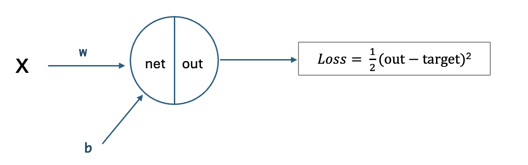

Source:  David-Tbo


In [31]:
red_png(r'./../png/Perceptron_one_input.png', source = "David-Tbo", factor=.46)

### The Forward Pass

In [15]:
x = 0.5
target = 0.9

# Fixe the seed for reproductibility
np.random.seed(0)

# Convert x to a numpy array for matrix multiplication
x = np.array([x])

# number of inputs
n_inputs = 1

# number of neurons in the layer = layer size = layer dimension
n_size = 1

# Weights and bias random initialisation with explicit dimensions
w_hidden = np.random.randn(n_inputs, n_size)
b_hidden = np.random.randn(n_size,)

# Numpy .dot product
net = np.dot(x, w_hidden.T) + b_hidden

# apply non linear sigmoide
out = 1/(1 + np.exp(-net))

print(f"in = {x}")
print(f"W_hidden : {w_hidden}")
print(f"b_hidden : {b_hidden}")
print(f"net = {net}")
print(f"out = {out}")

in = [0.5]
W_hidden : [[1.76405235]]
b_hidden : [0.40015721]
net = [1.28218338]
out = [0.78282121]


### The Loss

Loss (error) after the forward pass, with the initial weights

In [16]:
err_out = (out - target)**2
print(f"initial quadratic MSE: {err_out}")

initial quadratic MSE: [0.01373087]


In [17]:
# The mean square error function
def loss_mse(x,y):
    err = np.mean((x-y)**2)
    return err

In [18]:
loss_mse(out, target)

np.float64(0.01373086952270615)

### The backpropagation

In [19]:
# The Gradient of the Loss
dloss_dout = out - target
dout_dnet = out*(1-out)
dnet_dw = x
dnet_db = 1

# The chain rule
dloss_dw = dloss_dout*dout_dnet*dnet_dw
dloss_db = dloss_dout*dout_dnet*dnet_db

In [20]:
# learning rate
lr = 0.1

# Update weights and bias
w_hidden = w_hidden - lr*dloss_dw
b_hidden = b_hidden - lr*dloss_db

In [21]:
# Updates out and the loss
net = np.dot(x, w_hidden) + b_hidden
out = 1/(1 + np.exp(-net))
err_out = loss_mse(out, target)

print(f"quadratic MSE after one iteration: {err_out}")

quadratic MSE after one iteration: 0.013631898662298006


In [22]:
# Class Perceptron: version 1.0.
import numpy as np

# Fix the seed for reproducibility
np.random.seed(0)

x = 0.5
target = 0.9
# Convert x to a numpy array for matrix multiplication
x = np.array([x])

# Example usage
n_inputs = 1  # Number of inputs
layer_size = 1  # Number of neurons in the layer
# n_iter = 100  # Number of iterations

class Perceptron:

    def __init__(self, n_inputs, layer_size, n_iter=100, lr=0.1):
        self.n_inputs = n_inputs
        self.layer_size = layer_size
        self.n_iter = n_iter
        self.lr = lr
        self.w = np.random.randn(self.n_inputs, self.layer_size)
        self.b = np.random.randn(self.layer_size,)
        self.out = None  # Initialize out

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fwd_pass(self, X):
        self.X = X
        net = np.dot(self.X, self.w) + self.b
        out = self.sigmoid(net)
        self.out = out  # Store the output
        return out

    def loss_mse(self, x, y):
        return np.mean((x - y) ** 2)

    def grad_loss(self):
        for _ in range(self.n_iter):
            # The Gradients of the Loss
            dloss_dout = self.out - target
            dout_dnet = self.out * (1 - self.out)
            dnet_dw = self.X
            dnet_db = 1
            # The Chain rule
            dloss_dw = dloss_dout * dout_dnet * dnet_dw
            dloss_db = dloss_dout * dout_dnet * dnet_db

            # Update weights and bias
            self.w = self.w - self.lr * dloss_dw
            self.b = self.b - self.lr * dloss_db

            # Update the output
            self.out = self.fwd_pass(self.X)
        return self.out

perceptron = Perceptron(n_inputs, layer_size, n_iter=1000)
print(f"Weights (w): {perceptron.w}")
print(f"Bias (b): {perceptron.b}")

out = perceptron.fwd_pass(x)
print(f"Output (out): {out}")

loss = perceptron.loss_mse(out, target)
print(f"Initial Loss MSE (L): {loss}")

out = perceptron.grad_loss()  # Call grad_loss as a method
loss = perceptron.loss_mse(out, target)
print(f"Final Loss MSE (L):  {loss}")

Weights (w): [[1.76405235]]
Bias (b): [0.40015721]
Output (out): [0.78282121]
Initial Loss MSE (L): 0.01373086952270615
Final Loss MSE (L):  0.0002896582804301954


## 2. **Perceptron with a several inputs**

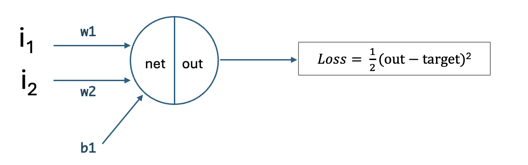

Source:  David-Tbo


In [27]:
red_png(r'./../png/Perceptron_two_inputs.png', source = "David-Tbo", factor=.46)

In [24]:
# Class Perceptron: version 1.1.

import numpy as np
# Fix the seed for reproducibility
np.random.seed(0)


# Example with three inputs:
x = [0.5, 0.3, 0.8]
target = 0.9

# Convert x to a numpy array for matrix multiplication
x = np.array(x)

n_inputs = 3  # Number of inputs
layer_size = 1  # Number of neurons in the layer


class Perceptron:

    def __init__(self, n_inputs, layer_size, n_iter=100, lr=0.1):
        self.n_inputs = n_inputs
        self.layer_size = layer_size
        self.n_iter = n_iter
        self.lr = lr
        self.w = np.random.randn(self.n_inputs, self.layer_size)
        self.b = np.random.randn(self.layer_size,)
        self.out = None  # Initialize out

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fwd_pass(self, X):
        self.X = X
        net = np.dot(self.X, self.w) + self.b
        out = self.sigmoid(net)
        self.out = out  # Store the output
        return out

    def loss_mse(self, x, y):
        return np.mean((x - y) ** 2)

    def grad_loss(self, target):
        for _ in range(self.n_iter):
            # The Gradients of the Loss
            dloss_dout = self.out - target
            dout_dnet = self.out * (1 - self.out)
            dnet_dw = self.X.reshape(-1, 1)  # Reshape X for correct dimension alignment
            dnet_db = 1
            # The Chain rule
            dloss_dw = dnet_dw * (dloss_dout * dout_dnet)
            dloss_db = dloss_dout * dout_dnet * dnet_db

            # Update weights and bias
            self.w = self.w - self.lr * dloss_dw
            self.b = self.b - self.lr * dloss_db

            # Update the output
            self.out = self.fwd_pass(self.X)
        return self.out

perceptron = Perceptron(n_inputs, layer_size, n_iter=100)
print(f"Weights (w): {perceptron.w}")
print(f"Bias (b): {perceptron.b}")

out = perceptron.fwd_pass(x)
print(f"Output (out): {out}")

loss = perceptron.loss_mse(out, target)
print(f"Initial Loss MSE (L): {loss}")

out = perceptron.grad_loss(target)  # Call grad_loss as a method
loss = perceptron.loss_mse(out, target)
print(f"Final Loss MSE (L): {loss}")

Weights (w): [[1.76405235]
 [0.40015721]
 [0.97873798]]
Bias (b): [2.2408932]
Output (out): [0.98246657]
Initial Loss MSE (L): 0.006800735021613126
Final Loss MSE (L): 0.006719100331128431


In [26]:
# Class Perceptron: version 1.2.

import numpy as np

# Fix the seed for reproducibility
np.random.seed(0)

# Example with three inputs:
x = [0.5, 0.3, 0.8]
x = [0.5, 0.3]
target = 0.9

# Example usage
# layer_size = 1  # Number of neurons in the layer

class Perceptron:

    def __init__(self, x, layer_size=1, n_iter=100, lr=0.1):
        # convert if x not a np.array()
        if not isinstance(x, np.ndarray):
            x = np.array(x)
        self.X = x
        self.n_inputs = x.shape[0]
        self.layer_size = layer_size
        self.n_iter = n_iter
        self.lr = lr
        self.w = np.random.randn(self.n_inputs, self.layer_size)
        self.b = np.random.randn(self.layer_size,)
        self.out = None  # Initialize out

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fwd_pass(self):
        net = np.dot(self.X, self.w) + self.b
        out = self.sigmoid(net)
        self.out = out  # Store the output
        return out

    def loss_mse(self, x, y):
        return np.mean((x - y) ** 2)

    def grad_loss(self, target):
        for _ in range(self.n_iter):
            # The Gradients of the Loss
            dloss_dout = self.out - target
            dout_dnet = self.out * (1 - self.out)
            dnet_dw = self.X.reshape(-1, 1)  # Reshape X for correct dimension alignment
            dnet_db = 1
            # The Chain rule
            dloss_dw = dnet_dw * (dloss_dout * dout_dnet)
            dloss_db = dloss_dout * dout_dnet * dnet_db

            # Update weights and bias
            self.w = self.w - self.lr * dloss_dw
            self.b = self.b - self.lr * dloss_db

            # Update the output
            self.out = self.fwd_pass()
        return self.out

perceptron = Perceptron(x, layer_size, n_iter=100)
print(f"Weights (w): {perceptron.w}")
print(f"Bias (b): {perceptron.b}")

out = perceptron.fwd_pass()
print(f"Output (out): {out}")

loss = perceptron.loss_mse(out, target)
print(f"Initial Loss MSE (L): {loss}")

out = perceptron.grad_loss(target)  # Call grad_loss as a method
loss = perceptron.loss_mse(out, target)
print(f"Final Loss MSE (L): {loss}")


Weights (w): [[1.76405235]
 [0.40015721]]
Bias (b): [0.97873798]
Output (out): [0.87876762]
Initial Loss MSE (L): 0.0004508138467457037
Final Loss MSE (L): 0.0003346739641201859


## 3. **Using Keras**

In [32]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

# Fix the seed for reproducibility
np.random.seed(0)

# Example with three inputs:
x = np.array([[0.5, 0.3, 0.8]])
target = np.array([[0.9]])

n_inputs = 3  # Number of inputs
layer_size = 1  # Number of neurons in the layer

# Define the model
model = Sequential()
model.add(Dense(layer_size, input_dim=n_inputs, activation='sigmoid'))

# Compile the model
model.compile(optimizer=SGD(lr=0.1), loss='mean_squared_error')

# Train the model
model.fit(x, target, epochs=100, verbose=0)

# Predict the output
out = model.predict(x)
print(f"Output (out): {out}")

# Calculate the loss
loss = np.mean((target - out) ** 2)
print(f"Final Loss MSE (L): {loss}")


ModuleNotFoundError: No module named 'keras'

## 4. **Using pytorch**

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Fix the seed for reproducibility
np.random.seed(0)
torch.manual_seed(0)

# Example with three inputs:
x = np.array([[0.5, 0.3, 0.8]], dtype=np.float32)
target = np.array([[0.9]], dtype=np.float32)

n_inputs = 3  # Number of inputs
layer_size = 1  # Number of neurons in the layer

# Convert numpy arrays to PyTorch tensors
x = torch.tensor(x)
target = torch.tensor(target)

# Define the model
class Perceptron(nn.Module):
    def __init__(self, n_inputs, layer_size):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(n_inputs, layer_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.linear(x)
        out = self.sigmoid(out)
        return out

model = Perceptron(n_inputs, layer_size)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Train the model
for epoch in range(100):
    optimizer.zero_grad()
    out = model(x)
    loss = criterion(out, target)
    loss.backward()
    optimizer.step()

# Predict the output
with torch.no_grad():
    out = model(x)
    print(f"Output (out): {out.numpy()}")

# Calculate the loss
loss = criterion(out, target)
print(f"Final Loss MSE (L): {loss.item()}")
